In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import joblib


In [2]:
df = pd.read_csv("csvs/hog_95/extracted_features_hog_95.csv",header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
0,Rachel_Leigh_Cook,0.101289,1.330157,-0.964354,0.278769,-0.543510,1.725658,-0.641089,-0.416891,-0.197742,...,52.0,689.0,2015.0,543.0,19.0,301.0,450.0,355.0,289.0,11011.0
1,Roseanne_Barr,0.391125,0.704784,1.217563,-0.780129,-1.414380,0.959051,1.196409,1.637598,0.144761,...,44.0,654.0,1721.0,548.0,26.0,416.0,510.0,451.0,378.0,7875.0
2,Vladimir_Putin,-1.246895,-0.680080,0.591671,-2.354134,-1.920589,-0.013368,0.060721,-0.179192,1.438939,...,35.0,504.0,3792.0,564.0,27.0,420.0,679.0,460.0,611.0,17388.0
3,Carlos_Menem,0.597257,-0.661087,1.356273,-0.878202,-0.588220,-0.435263,-0.077499,-0.152108,0.537329,...,53.0,495.0,1593.0,566.0,34.0,343.0,563.0,399.0,338.0,9557.0
4,Lynne_Thigpen,-1.589231,-0.049223,-1.306154,-0.461846,0.250779,-2.198609,-0.026885,0.607296,-0.321626,...,39.0,520.0,1744.0,502.0,24.0,339.0,531.0,398.0,394.0,14844.0


In [3]:
df_test = pd.read_csv("csvs/hog_95/extracted_features_test_hog_95.csv",header=None)
df = pd.concat([df,df_test],axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 2646
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 328.1+ MB


In [4]:
#min number of samples per class to be 50
df_modified_50 = df[df[0].map(df[0].value_counts()) >= 50]
df_modified_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 6 to 2641
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 38.7+ MB


In [5]:
df_modified_50[0].unique().shape

(12,)

In [6]:

Features = df_modified_50.drop(0,axis = 1)
print(Features.shape)
target = df_modified_50[0]
print(target.shape)

(1560, 3248)
(1560,)


In [7]:
Features_all=Features.loc[:,:]
Features_HoG_95 = Features.loc[:,:946]
Features_CNN = Features.loc[:,946:2993]
Features_LBP = Features.loc[:,2993:]

In [8]:
print("No of CNN features: ",Features_CNN.shape[1])
print("No of HoG features covering 0.95 variance: ",Features_HoG_95.shape[1])
print("No of LBP Features are: ",Features_LBP.shape[1])

No of CNN features:  2048
No of HoG features covering 0.95 variance:  946
No of LBP Features are:  256


In [99]:

## model on hog features 

X = df_modified_50.iloc[:, 1:945]
y = df_modified_50.iloc[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_new = scaler.fit_transform(X_train_scaled)
X_test_new = scaler.transform(X_test_scaled)

joblib.dump(scaler,'minmax_scaler.joblib')



# Create an instance of MultinomialNB
nb_model_multinomial = MultinomialNB()

# Train the Multinomial Naive Bayes model
nb_model_multinomial.fit(X_train_new, y_train)

# Predict labels for the test set
y_pred = nb_model_multinomial.predict(X_test_new)

joblib.dump(nb_model_multinomial,'multinomial.joblib')

# Evaluate the accuracy of the model
accuracy_multinomial = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model on hog features :", accuracy_multinomial)


Accuracy of Multinomial Naive Bayes model on hog features : 0.30448717948717946


In [100]:

# Generate and print classification report
report_multinomial = classification_report(y_test, y_pred)
print("Classification Report for Multinomial Naive Bayes for hog features :")
print(report_multinomial)


Classification Report for Multinomial Naive Bayes for hog features :
                   precision    recall  f1-score   support

     Ariel_Sharon       0.00      0.00      0.00        14
     Colin_Powell       1.00      0.06      0.12        47
  Donald_Rumsfeld       0.00      0.00      0.00        31
    George_W_Bush       0.30      1.00      0.46        92
Gerhard_Schroeder       0.00      0.00      0.00        21
      Hugo_Chavez       0.00      0.00      0.00        21
   Jacques_Chirac       0.00      0.00      0.00        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       0.00      0.00      0.00        12
Junichiro_Koizumi       0.00      0.00      0.00        17
  Serena_Williams       0.00      0.00      0.00         8
       Tony_Blair       0.00      0.00      0.00        25

         accuracy                           0.30       312
        macro avg       0.11      0.09      0.05       312
     weighted avg       0.24      0.30      

c:\Users\AVANI RAI\Desktop\python env in vs code\Face_Recognition\prmlproj\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AVANI RAI\Desktop\python env in vs code\Face_Recognition\prmlproj\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AVANI RAI\Desktop\python env in vs code\Face_Recognition\prmlproj\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

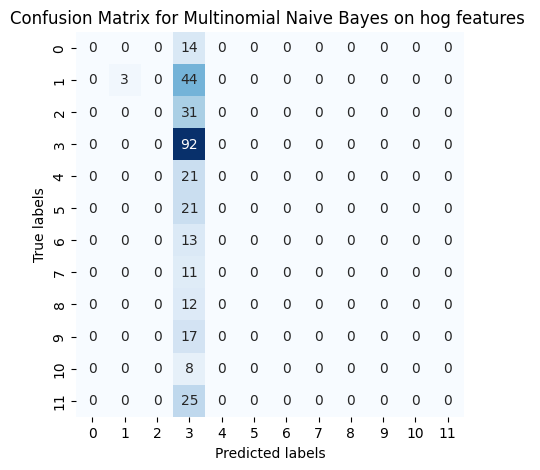

In [101]:

# Visualize confusion matrix
conf_matrix_multinomial = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5 ))
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Multinomial Naive Bayes on hog features ')
plt.show()

In [102]:
# model on cnn features features 


X = df_modified_50.iloc[:, 945:2993]
y = df_modified_50.iloc[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaledd = scaler.fit_transform(X_train_scaled )
X_test_scaledd = scaler.transform(X_test_scaled )

joblib.dump(scaler,'minmax_scaler.joblib')

# Create an instance of MultinomialNB
nb_model_multinomial = MultinomialNB()

# Train the Multinomial Naive Bayes model
nb_model_multinomial.fit(X_train_scaledd, y_train)

# Predict labels for the test set
y_pred = nb_model_multinomial.predict(X_test_scaledd)

joblib.dump(nb_model_multinomial,'multinomial.joblib')

# Evaluate the accuracy of the model
accuracy_multinomial = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model on cnn features :", accuracy_multinomial)

Accuracy of Multinomial Naive Bayes model on cnn features : 0.49038461538461536


In [103]:

# Generate and print classification report
report_multinomial = classification_report(y_test, y_pred)
print("Classification Report for Multinomial Naive Bayes for cnn features :")
print(report_multinomial)

Classification Report for Multinomial Naive Bayes for cnn features :
                   precision    recall  f1-score   support

     Ariel_Sharon       0.75      0.64      0.69        14
     Colin_Powell       0.34      0.81      0.48        47
  Donald_Rumsfeld       0.74      0.45      0.56        31
    George_W_Bush       0.58      0.63      0.60        92
Gerhard_Schroeder       0.27      0.14      0.19        21
      Hugo_Chavez       0.48      0.48      0.48        21
   Jacques_Chirac       1.00      0.08      0.14        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       1.00      0.17      0.29        12
Junichiro_Koizumi       0.60      0.18      0.27        17
  Serena_Williams       0.88      0.88      0.88         8
       Tony_Blair       0.38      0.32      0.35        25

         accuracy                           0.49       312
        macro avg       0.58      0.40      0.41       312
     weighted avg       0.55      0.49      

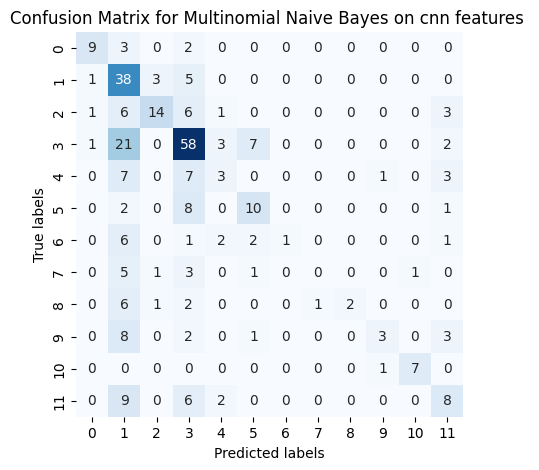

In [104]:

# Visualize confusion matrix
conf_matrix_multinomial = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5 ))
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Multinomial Naive Bayes on cnn features ')
plt.show()

In [105]:
# model on lbp features 


X = df_modified_50.iloc[:, 2993:3249]
y = df_modified_50.iloc[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_new= scaler.fit_transform(X_train_scaled)
X_test_new  = scaler.transform(X_test_scaled )

joblib.dump(scaler,'minmax_scaler.joblib')

# Create an instance of MultinomialNB
nb_model_multinomial = MultinomialNB()

# Train the Multinomial Naive Bayes model
nb_model_multinomial.fit(X_train_new , y_train)

# Predict labels for the test set
y_pred = nb_model_multinomial.predict(X_test_new )

joblib.dump(nb_model_multinomial,'multinomial.joblib')

# Evaluate the accuracy of the model
accuracy_multinomial = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model on lbp features :", accuracy_multinomial)

Accuracy of Multinomial Naive Bayes model on lbp features : 0.30128205128205127


In [106]:

# Generate and print classification report
report_multinomial = classification_report(y_test, y_pred)
print("Classification Report for Multinomial Naive Bayes for lbp features :")
print(report_multinomial)

Classification Report for Multinomial Naive Bayes for lbp features :
                   precision    recall  f1-score   support

     Ariel_Sharon       0.50      0.07      0.12        14
     Colin_Powell       0.24      0.30      0.26        47
  Donald_Rumsfeld       0.00      0.00      0.00        31
    George_W_Bush       0.32      0.86      0.46        92
Gerhard_Schroeder       0.00      0.00      0.00        21
      Hugo_Chavez       0.00      0.00      0.00        21
   Jacques_Chirac       0.00      0.00      0.00        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       0.00      0.00      0.00        12
Junichiro_Koizumi       0.00      0.00      0.00        17
  Serena_Williams       0.00      0.00      0.00         8
       Tony_Blair       0.00      0.00      0.00        25

         accuracy                           0.30       312
        macro avg       0.09      0.10      0.07       312
     weighted avg       0.15      0.30      

c:\Users\AVANI RAI\Desktop\python env in vs code\Face_Recognition\prmlproj\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AVANI RAI\Desktop\python env in vs code\Face_Recognition\prmlproj\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AVANI RAI\Desktop\python env in vs code\Face_Recognition\prmlproj\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

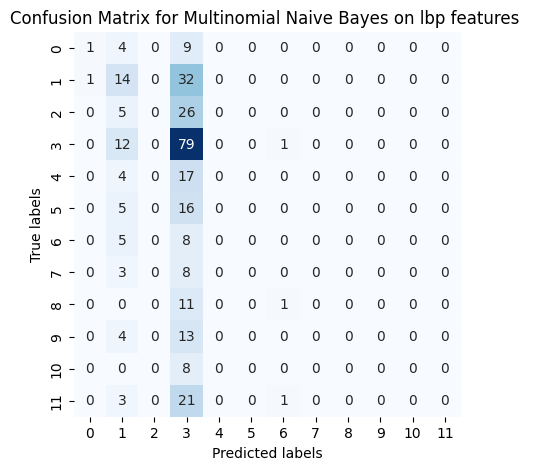

In [107]:

# Visualize confusion matrix
conf_matrix_multinomial = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5 ))
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Multinomial Naive Bayes on lbp features ')
plt.show()

In [108]:
# model on all features 

X = df_modified_50.iloc[:, 1:3249]
y = df_modified_50.iloc[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_new  = scaler.fit_transform(X_train_scaled )
X_test_new  = scaler.transform(X_test_scaled )

joblib.dump(scaler,'minmax_scaler.joblib')

# Create an instance of MultinomialNB
nb_model_multinomial = MultinomialNB()

# Train the Multinomial Naive Bayes model
nb_model_multinomial.fit(X_train_new , y_train)

# Predict labels for the test set
y_pred = nb_model_multinomial.predict(X_test_new )

joblib.dump(nb_model_multinomial,'multinomial.joblib')

# Evaluate the accuracy of the model
accuracy_multinomial = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model on all features :", accuracy_multinomial)

Accuracy of Multinomial Naive Bayes model on all features : 0.4967948717948718


In [109]:

# Generate and print classification report
report_multinomial = classification_report(y_test, y_pred)
print("Classification Report for Multinomial Naive Bayes for all features :")
print(report_multinomial)

Classification Report for Multinomial Naive Bayes for all features :
                   precision    recall  f1-score   support

     Ariel_Sharon       0.57      0.57      0.57        14
     Colin_Powell       0.36      0.74      0.49        47
  Donald_Rumsfeld       0.87      0.42      0.57        31
    George_W_Bush       0.61      0.67      0.64        92
Gerhard_Schroeder       0.25      0.10      0.14        21
      Hugo_Chavez       0.43      0.48      0.45        21
   Jacques_Chirac       0.67      0.15      0.25        13
    Jean_Chretien       0.50      0.09      0.15        11
    John_Ashcroft       1.00      0.17      0.29        12
Junichiro_Koizumi       0.57      0.24      0.33        17
  Serena_Williams       1.00      0.75      0.86         8
       Tony_Blair       0.29      0.40      0.34        25

         accuracy                           0.50       312
        macro avg       0.59      0.40      0.42       312
     weighted avg       0.56      0.50      

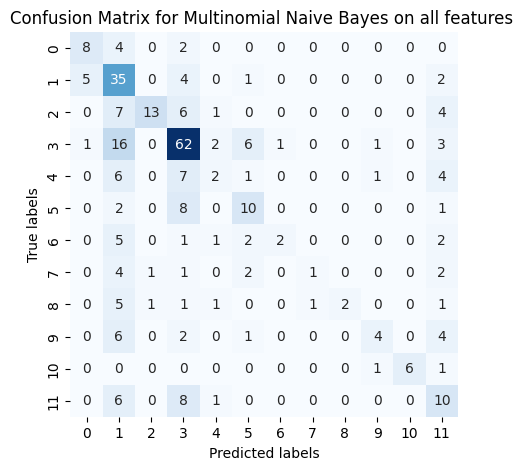

In [110]:

# Visualize confusion matrix
conf_matrix_multinomial = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5 ))
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Multinomial Naive Bayes on all features ')
plt.show()